This is a compilation of face recognition tutorials by implementing different methods such as Haar Cascades, MTCNN and so on.
 
Read about Haar Cascades in more detail by referring to this link: https://docs.opencv.org/3.1.0/d7/d8b/tutorial_py_face_detection.html

Read about how to implement MTCNN in face recognition by referring to this link: https://handsondeeplearning.com/face-detection-basics-using-mtcnn-implementation/

Firstly, we should upload the necessary files and some sample pictures to perform face recognition. Please go to this link https://github.com/opencv/opencv and download the whole source files as .zip folder. After that, open the folder you downloaded just now and navigate to **data > haarcascades > haarcascade_frontalface_default.xml**.

In [ ]:
# Upload the picture(s) and "haarcascade_frontalface_default.xml" from your system
from google.colab import files
file = files.upload()

Saving test1.jpg to test1.jpg
Saving test2.jpg to test2.jpg


In [ ]:
# Import necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Load a cascade file for detecting faces
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load an image from file
# Rename 'File_name_with_type' as the picture you just uploaded with its format
img = cv2.imread('test2.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Look for faces in the image using the loaded cascade file
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

print(faces)

[[428  48  38  38]
 [216  38  49  49]
 [364 155  46  46]
 [207 262  49  49]
 [ 96 267  50  50]
 [315 269  46  46]]


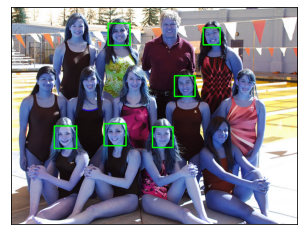

In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roigray = gray[y:y+h, x:x+w]
    roicolor = img[y:y+h, x:x+w]
plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)

Below is another tutorial of face recognition using by implementing MTCNN. The original tutorial link is https://handsondeeplearning.com/face-detection-basics-using-mtcnn-implementation/

In [ ]:
!pip install mtcnn

from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

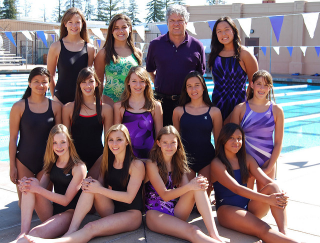

In [ ]:
# Image filename
image_filename = 'test2.jpg'

# Read the image file as a pixel array
img = cv2.imread(image_filename)

# Resize the image by half
width = int(img.shape[1]/2)
height = int(img.shape[0]/2)
img = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)

# Display the image
cv2_imshow(img)

# Convert the image to RGB from BGR format which Open CV uses as default
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
face_locations = []

mtcnn_face_detector_model = MTCNN()
face_locations = mtcnn_face_detector_model.detect_faces(rgb_image)
print('# of faces detected:', len(face_locations))

for face_location in face_locations:
  print(face_location)

# of faces detected: 13
{'box': [160, 134, 16, 21], 'confidence': 0.9998810291290283, 'keypoints': {'left_eye': (165, 142), 'right_eye': (173, 142), 'nose': (169, 148), 'mouth_left': (165, 150), 'mouth_right': (172, 150)}}
{'box': [31, 75, 16, 18], 'confidence': 0.9997468590736389, 'keypoints': {'left_eye': (36, 82), 'right_eye': (44, 82), 'nose': (41, 86), 'mouth_left': (37, 89), 'mouth_right': (44, 89)}}
{'box': [113, 20, 14, 20], 'confidence': 0.9997385144233704, 'keypoints': {'left_eye': (116, 28), 'right_eye': (124, 27), 'nose': (120, 31), 'mouth_left': (117, 35), 'mouth_right': (125, 34)}}
{'box': [225, 130, 15, 21], 'confidence': 0.9992297887802124, 'keypoints': {'left_eye': (231, 138), 'right_eye': (239, 138), 'nose': (237, 143), 'mouth_left': (231, 146), 'mouth_right': (238, 146)}}
{'box': [187, 78, 15, 21], 'confidence': 0.999133288860321, 'keypoints': {'left_eye': (190, 86), 'right_eye': (197, 85), 'nose': (193, 90), 'mouth_left': (191, 94), 'mouth_right': (198, 93)}}
{'box'

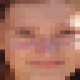

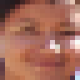

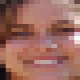

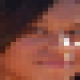

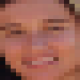

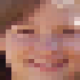

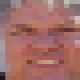

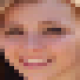

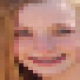

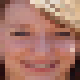

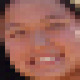

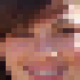

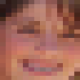

In [ ]:
for face_location in face_locations:
  x1, y1, width, height = face_location['box']
  x1, y1 = abs(x1), abs(y1)
  x2, y2 = x1 + width, y1 + height

  face = img[y1:y2, x1:x2]
  face = cv2.resize(face, (80, 80), interpolation = cv2.INTER_AREA)
  cv2_imshow(face)

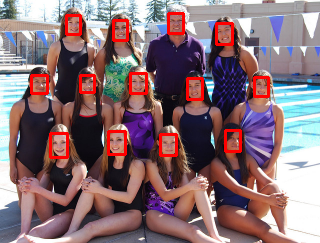

NameError: ignored

In [ ]:
for face_location in face_locations:
  x1, y1, width, height = face_location['box']
  x2, y2 = x1 + width, y1 + height

  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2_imshow(img)

for i in range(o,len(faces)):
    faceID = i
    currentFace = faces[i]

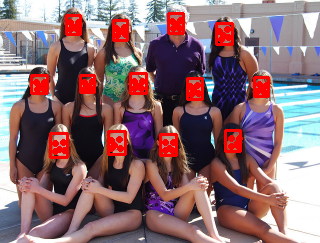

In [ ]:
circle_radius = 2
circle_thickness = 2
circle_color = (0, 0, 255)

# Loop through the output array
for face_location in face_locations:
  # Obtain the keypoints which points to various features in the face
  keypoints = face_location['keypoints']

  # Draw a circle at each of those points on the input image
  cv2.circle(img, keypoints['left_eye'], circle_radius, circle_color, circle_thickness)
  cv2.circle(img, keypoints['right_eye'], circle_radius, circle_color, circle_thickness)
  cv2.circle(img, keypoints['nose'], circle_radius, circle_color, circle_thickness)
  cv2.circle(img, keypoints['mouth_left'], circle_radius, circle_color, circle_thickness)
  cv2.circle(img, keypoints['mouth_right'], circle_radius, circle_color, circle_thickness)

# Display the output image with both the face and features of the detected
cv2_imshow(img)